In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
import cv2

import os
from pathlib import Path
import tensorflow as tf

Dict num_to_char and char_to_num

In [ ]:
s = "123456789"
s += "abcdefghijklmnopqrstuvwxyz".upper()
s += "abdeghijlmnqrtf"
s_remove = "0cfkopsuvwxyz"
s_full = "0123456789"
s_full += "abcdefghijklmnopqrstuvwxyz".upper()
s_full += "abcdefghijklmnopqrstuvwxyz"

In [ ]:
l_char = [char for char in s]
l_num = list(range(len(s)))
d_char_to_num = {l_char[i]: l_num[i] for i in range(len(l_char))}
print(d_char_to_num)
d_charRemove_to_num = {}
d_char_to_num['0'] = d_char_to_num['O']
d_char_to_num['c'] = d_char_to_num['C']
d_char_to_num['f'] = d_char_to_num['F']
d_char_to_num['k'] = d_char_to_num['K']
d_char_to_num['o'] = d_char_to_num['O']
d_char_to_num['p'] = d_char_to_num['P']
d_char_to_num['s'] = d_char_to_num['S']
d_char_to_num['u'] = d_char_to_num['U']
d_char_to_num['v'] = d_char_to_num['V']
d_char_to_num['w'] = d_char_to_num['W']
d_char_to_num['x'] = d_char_to_num['X']
d_char_to_num['y'] = d_char_to_num['Y']
d_char_to_num['z'] = d_char_to_num['Z']

print(d_char_to_num)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34, 'a': 35, 'b': 36, 'd': 37, 'e': 38, 'g': 39, 'h': 40, 'i': 41, 'j': 42, 'l': 43, 'm': 44, 'n': 45, 'q': 46, 'r': 47, 't': 48, 'f': 49}
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34, 'a': 35, 'b': 36, 'd': 37, 'e': 38, 'g': 39, 'h': 40, 'i': 41, 'j': 42, 'l': 43, 'm': 44, 'n': 45, 'q': 46, 'r': 47, 't': 48, 'f': 14, '0': 23, 'c': 11, 'k': 19, 'o': 23, 'p': 24, 's': 27, 'u': 29, 'v': 30, 'w': 31, 'x': 32, 'y': 33, 'z': 34}


In [ ]:
l_charFull = [char for char in s_full]
l_numFull = list(range(len(s_full)))

d_num_to_char = {l_numFull[i]: l_charFull[i] for i in range(len(l_charFull))}
print(d_num_to_char)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


In [ ]:
def char_to_num(c):
  if c in list(d_char_to_num.keys()):
    return d_char_to_num[c]
  else:
    return d_charRemove_to_num[c]

In [ ]:
def num_to_char(num):
  return [i for i in d_char_to_num if d_char_to_num[i]==num][0]

# Character Dataset

Get DataSet

*https://www.kaggle.com/code/danishashah/handwritten-character-recognition*

In [ ]:
!unzip -qq char_dataset.zip

replace char_dataset/Sample001/img001-002_padded.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

List label of image

In [ ]:
img_paths = []
labels = []
for i in range(1,63):
  # Path to the data directory
  data_dir = Path("/content/char_dataset/Sample" + str(i).zfill(3) +"/")
  # List path of image
  new_paths = list(map(str, list(data_dir.glob("*.png"))))
  img_paths += new_paths

  label = d_num_to_char[i-1]
  labels += [char_to_num(label)] * len(new_paths)

In [ ]:
labels_oh = tf.one_hot(np.array(labels), 50).numpy()

In [ ]:
print(labels_oh.shape)
print(labels_oh[180])

(10228, 50)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


List img

In [ ]:
imgs = [cv2.imread(path) for path in img_paths]
#imgs_resized = np.array([cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA) for img in imgs])

In [ ]:
imgs[0].shape

(50, 200, 3)

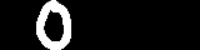

In [ ]:
cv2_imshow(imgs[0])

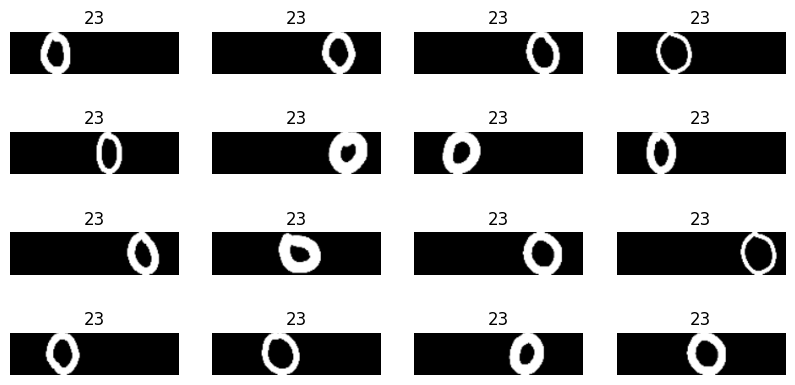

In [ ]:
# Visualize data
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for i in range(16):
    img = imgs[i]
    label = labels[i]
    ax[i // 4, i % 4].imshow(img[:, :, 0], cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
plt.show()

Train/Val Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(np.array(imgs), np.array(labels_oh),
                                                      random_state=104,
                                                      test_size=0.3,
                                                      shuffle=True)

# Captcha Dataset

In [ ]:
!unzip -qq captcha_dataset.zip

replace captcha_dataset/0054y.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

List captcha label

In [ ]:
captcha_paths = []
str_labels = []
# Path to the data directory
captcha_dir = Path("/content/captcha_dataset/")
# List path of image
captcha_paths = list(map(str, list(captcha_dir.glob("*.png"))))

for path in captcha_paths:
  str_labels.append([char_to_num(path.split('/')[-1].replace('.png', '')[i]) for i in range(5)])

# Label num
num_labels = np.array(str_labels)

In [ ]:
# Label oh_vecter
oh_labels = np.array([tf.one_hot(np.array(num_labels[i]), 50).numpy() for i in range(len(num_labels))])
oh_labels.shape

(1339, 5, 50)

List captcha image

In [ ]:
captchas = [cv2.imread(path) for path in captcha_paths]
#captchas = [cv2.transpose(cv2.imread(path)) for path in captcha_paths]

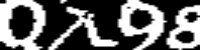

String remove char:  ['Q', '7', 'L', '9', '8']
Number:  [25  6 20  8  7]
One hot:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [ ]:
cv2_imshow(captchas[0])
print("String remove char: ", [num_to_char(num_labels[0][i]) for i in range(5)])
print("Number: ", num_labels[0])
print("One hot: ", oh_labels[0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(np.array(captchas), oh_labels,
                                                      random_state=104,
                                                      test_size=0.3,
                                                      shuffle=True)

#1.Character Classification Model



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling1D
from keras.models import load_model, Model
from tensorflow.keras.models import Sequential
import keras

## Create

In [ ]:
class CC_Model:
    # constructor
    def __init__(self):
        self.model = None

    # Định nghĩa kiến trúc của mô hình
    def build(self, input_dim):
        input = Input(shape = input_dim) # input

        # First conv block
        x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input)
        x = layers.MaxPooling2D((2, 2), name="pool1")(x)

        # Second conv block
        x = layers.Conv2D(128,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
        x = layers.MaxPooling2D((5, 2), name="pool2")(x)

        x = layers.GlobalAveragePooling2D(name="GAP")(x)

        output = layers.Dense(50, activation="softmax", name="dense3")(x)

        self.model = Model(input, output)

    # Huấn luyện mô hình
    def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
        opt = tf.keras.optimizers.SGD(learning_rate=0.001) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # CCE loss
        self.model.fit(x_train, y_train, epochs = 100, batch_size = 64)

    # Load mô hình từ file
    def load(self, model_file):
        self.model = load_model(model_file)

    # Lưu mô hình hiện tại xuống file
    def save(self, model_file):
        self.model.save(model_file)

    # Tóm tắt kiến trúc mạng
    def summary(self):
        self.model.summary()

    # Thử nghiệm mô hình với dữ liệu ảnh đầu vào
    def predict(self, x_test):
        return self.model.predict(x_test)

## Train

In [ ]:
CC_model = CC_Model()
CC_model.build(X_train[0].shape)
CC_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 200, 3)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 50, 200, 64)       1792      
                                                                 
 pool1 (MaxPooling2D)        (None, 25, 100, 64)       0         
                                                                 
 Conv2 (Conv2D)              (None, 25, 100, 128)      73856     
                                                                 
 pool2 (MaxPooling2D)        (None, 5, 50, 128)        0         
                                                                 
 GAP (GlobalAveragePooling2D  (None, 128)              0         
 )                                                               
                                                           

In [ ]:
CC_model.train(X_train, y_train)

Epoch 1/100
112/112 [==============================] - 4s 29ms/step - loss: 10.0497 - accuracy: 0.0725
Epoch 2/100
112/112 [==============================] - 3s 29ms/step - loss: 3.4612 - accuracy: 0.1291
Epoch 3/100
112/112 [==============================] - 3s 29ms/step - loss: 3.2521 - accuracy: 0.1722
Epoch 4/100
112/112 [==============================] - 3s 29ms/step - loss: 3.0984 - accuracy: 0.2018
Epoch 5/100
112/112 [==============================] - 3s 29ms/step - loss: 2.9729 - accuracy: 0.2343
Epoch 6/100
112/112 [==============================] - 3s 30ms/step - loss: 2.8708 - accuracy: 0.2549
Epoch 7/100
112/112 [==============================] - 3s 29ms/step - loss: 2.7706 - accuracy: 0.2784
Epoch 8/100
112/112 [==============================] - 3s 29ms/step - loss: 2.6731 - accuracy: 0.3037
Epoch 9/100
112/112 [==============================] - 3s 29ms/step - loss: 2.5851 - accuracy: 0.3257
Epoch 10/100
112/112 [==============================] - 3s 30ms/step - loss: 2.53

## Predict

In [ ]:
# Hàm tính độ đo accuracy phục vụ đánh giá mô hình
accuracy = lambda y_true, y_pred: (y_true==y_pred).sum()/len(y_true)
y_pred = CC_model.predict(X_valid)
CC_model_acc = accuracy(y_valid.argmax(axis=1), y_pred.argmax(axis=1))
print(CC_model_acc)

96/96 [==============================] - 1s 5ms/step
0.7305311176278918


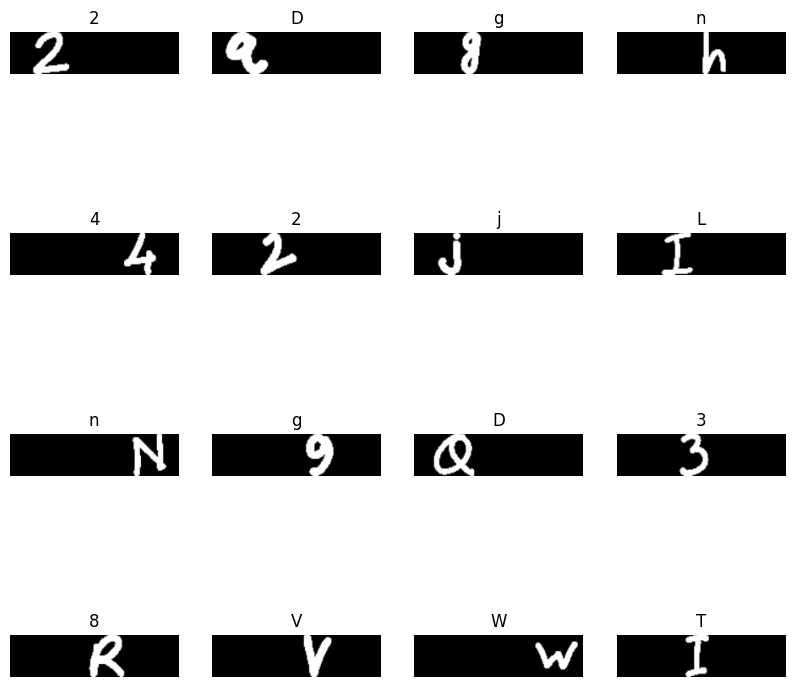

In [ ]:
# Visualize data
_, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    img = X_valid[i+240]
    label = y_pred.argmax(axis=1)[i+240]
    ax[i // 4, i % 4].imshow(img[:, :, 0], cmap="gray")
    ax[i // 4, i % 4].set_title(num_to_char(label))
    ax[i // 4, i % 4].axis("off")
plt.show()

## Use CC_Model to check character in catpcha

In [ ]:
from keras import backend as K

In [ ]:
def get_layers_output(model, input_model):
  inp = model.input
  outputs = [layer.output for layer in model.layers]
  functors = [K.function([inp], [out]) for out in outputs]

  return [func([np.array([input_model])]) for func in functors]

In [ ]:
def getWeights_n_to_1(layer_connectedTo, node_idx, model):
  weights_bias = model.layers[layer_connectedTo].get_weights()
  if len(weights_bias) == 0:
    return

  return [weights_bias[0][i][:][node_idx] for i in range(len(weights_bias[0]))]

In [ ]:
def get_subs_of_convOutput(conv_output):
  return [conv_output[0,:,:,i] for i in range(conv_output.shape[3])]

In [ ]:
def get_mappingMT_by_Subs_Weights(subs, weights):
  mapping_mt = np.zeros(shape=(5,50), dtype='float32')

  for i in range(len(subs)):
    mapping_mt += subs[i] * weights[i]

  # Loại bỏ các giá trị < 0 của ma trận kết hợp
  mapping_mt[mapping_mt < 0] = 0

  return mapping_mt

In [ ]:
def get_mapping_bb(coff_mt_eachCell, thresh):
  bool_arr = coff_mt_eachCell >= thresh

  sum_row = [sum(bool_arr[i]) for i in range(len(bool_arr))]
  row_greater0 = [i for i in range(len(sum_row)) if sum_row[i] > 0]
  bottom_idx = max(row_greater0)
  top_idx = min(row_greater0)

  sum_column = [sum(bool_arr[:,i]) for i in range(bool_arr.shape[1])]
  column_greater0 = [i for i in range(len(sum_column)) if sum_column[i] > 0]
  right_idx = max(column_greater0)
  left_idx = min(column_greater0)

  return [top_idx, left_idx, bottom_idx, right_idx]

### Test with captcha i

In [ ]:
num_captcha = 5

In [ ]:
layers_output = get_layers_output(CC_model.model, captchas[num_captcha])

# Shape output in each layer
print(len(layers_output))
for i in range(len(layers_output)):
  print(layers_output[i][0].shape)

7
(1, 50, 200, 3)
(1, 50, 200, 64)
(1, 25, 100, 64)
(1, 25, 100, 128)
(1, 5, 50, 128)
(1, 128)
(1, 50)


In [ ]:
# Weights GAP to Output
weights_GAP_to_Output = np.array([getWeights_n_to_1(-1, i, CC_model.model) for i in range(layers_output[-1][0].shape[1])])
print(weights_GAP_to_Output.shape)

(50, 128)


In [ ]:
# Pool2 output
pool2_output = layers_output[-3][0][0]
print(pool2_output.shape)

subs_pool2 = get_subs_of_convOutput(layers_output[-3][0])

(5, 50, 128)


In [ ]:
# Output output
output_output = layers_output[-1][0][0]
print(output_output.shape)

(50,)


In [ ]:
# Subs_pool2 x weights_GAP_to_Output[i]

mapping_mt = np.array([get_mappingMT_by_Subs_Weights(subs_pool2, weights_GAP_to_Output[i]) for i in range(weights_GAP_to_Output.shape[0])])
print(mapping_mt.shape)

lightest = [mapping_mt[i] // np.max(mapping_mt[i]) for i in range(mapping_mt.shape[0])]
lightest_idx = [np.where(lightest[i] == 1) for i in range(len(lightest))]
print(len(lightest_idx))
print(lightest_idx[0])

lightest_oy = [lightest_idx[i][0][0] for i in range(len(lightest_idx))]
print(lightest_oy)

(50, 5, 50)
50
(array([4]), array([11]))
[4, 4, 4, 1, 0, 0, 0, 4, 0, 3, 0, 4, 4, 2, 4, 0, 3, 4, 0, 0, 0, 3, 1, 3, 4, 2, 4, 4, 4, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 4, 3, 3, 4, 2, 0, 4]


In [ ]:
char_cf_order = np.argsort(-output_output)

dict_ = {}

for id in char_cf_order:
  if lightest_oy[id] not in dict_.keys():
    dict_[lightest_oy[id]] = id

In [ ]:
label_pred = []
for i in range(5):
  if i in dict_.keys():
    label_pred.append(dict_[i])
  else:
    label_pred.append(-1)

print(label_pred)
print("Number: ", num_labels[num_captcha])

[15, 3, 25, 32, 2]
Number:  [ 3  2  8 23  6]


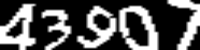

In [ ]:
cv2_imshow(captchas[num_captcha])

#2.Part Classification Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling1D
from keras.models import load_model, Model
from tensorflow.keras.models import Sequential
import keras

## Create

In [ ]:
class PartClassificationModel:
    # constructor
    def __init__(self):
        self.model = None

    # Định nghĩa kiến trúc của mô hình
    def build(self, input_dim):
        input = Input(shape = input_dim) # input

        # First conv block
        x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input)
        x = layers.MaxPooling2D((2, 2), name="pool1")(x)

        # Second conv block
        x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
        x = layers.MaxPooling2D((2, 2), name="pool2")(x)

        # We have used two max pool with pool size and strides 2.
        # Hence, downsampled feature maps are 4x smaller. The number of
        # filters in the last layer is 64 --> output volume shape = (50,12,64)
        # Reshape to "split" the volume in 5 time-steps
        x = layers.Reshape(target_shape=(5, 7680), name="reshape")(x)

        # FC layers
        x = layers.Dense(256, activation="relu", name="dense1")(x)
        x = layers.Dense(256, activation="relu", name="dense2")(x)

        # Output layer
        output = layers.Dense(50, activation="softmax", name="dense3")(x)

        self.model = Model(input, output)

    # Huấn luyện mô hình
    def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
        opt = tf.keras.optimizers.SGD(learning_rate=0.001) # Stochastic Gradient Descent
        self.model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy']) # CCE loss
        self.model.fit(x_train, y_train, epochs = 30, batch_size = 64)

    # Load mô hình từ file
    def load(self, model_file):
        self.model = load_model(model_file)

    # Lưu mô hình hiện tại xuống file
    def save(self, model_file):
        self.model.save(model_file)

    # Tóm tắt kiến trúc mạng
    def summary(self):
        self.model.summary()

    # Thử nghiệm mô hình với dữ liệu ảnh đầu vào
    def predict(self, x_test):
        return self.model.predict(x_test)

In [ ]:
PC_Model = PartClassificationModel()
PC_Model.build(X_train[0].shape)
PC_Model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 200, 3)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 50, 200, 32)       896       
                                                                 
 pool1 (MaxPooling2D)        (None, 25, 100, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 25, 100, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 12, 50, 64)        0         
                                                                 
 reshape (Reshape)           (None, 5, 7680)           0         
                                                                 
 dense1 (Dense)              (None, 5, 256)            196

## Train

In [ ]:
PC_Model.train(X_train, y_train)

Epoch 1/30
15/15 [==============================] - 2s 40ms/step - loss: 198.6675 - accuracy: 0.0314
Epoch 2/30
15/15 [==============================] - 0s 18ms/step - loss: 14.5791 - accuracy: 0.0393
Epoch 3/30
15/15 [==============================] - 0s 17ms/step - loss: 5.6092 - accuracy: 0.0504
Epoch 4/30
15/15 [==============================] - 0s 17ms/step - loss: 4.2266 - accuracy: 0.0649
Epoch 5/30
15/15 [==============================] - 0s 17ms/step - loss: 3.8857 - accuracy: 0.0822
Epoch 6/30
15/15 [==============================] - 0s 17ms/step - loss: 3.6845 - accuracy: 0.1031
Epoch 7/30
15/15 [==============================] - 0s 17ms/step - loss: 3.4857 - accuracy: 0.1313
Epoch 8/30
15/15 [==============================] - 0s 17ms/step - loss: 3.2178 - accuracy: 0.1844
Epoch 9/30
15/15 [==============================] - 0s 17ms/step - loss: 2.8724 - accuracy: 0.2604
Epoch 10/30
15/15 [==============================] - 0s 17ms/step - loss: 2.4392 - accuracy: 0.3714
Epoch 

## Predict

In [ ]:
y_pred_PC_Model = PC_Model.predict(X_valid)
y_pred_PC_Model.shape

13/13 [==============================] - 0s 11ms/step


(402, 5, 50)

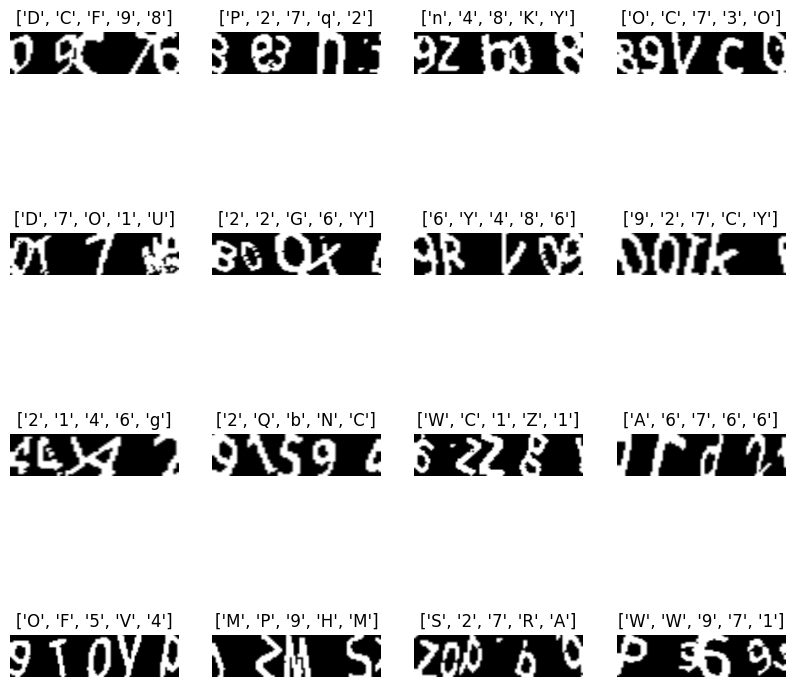

In [ ]:
# Visualize data
_, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    img = X_valid[i]
    label = [np.argmax(y_pred_PC_Model[i][j]) for j in range(5)]
    ax[i // 4, i % 4].imshow(img[:, :, 0], cmap="gray")
    ax[i // 4, i % 4].set_title([num_to_char(c) for c in label])
    ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
labels_pred = []

for i in range(y_pred_PC_Model.shape[0]):
  label = []
  for j in range(y_pred_PC_Model.shape[1]):
    label.append(np.argmax(y_pred_PC_Model[i][j]))
  labels_pred.append(label)

labels_pred = np.array(labels_pred)
labels_pred.shape

(402, 5)

## Metric

In [ ]:
num_true_label = 0

for i in range(len(labels_pred)):
  if False not in (labels_pred[i] == num_labels[i]):
    num_true_label += 1

print("Ti le captcha dung: ", num_true_label/len(labels_pred))

Ti le captcha dung:  0.0


In [ ]:
num_true_char = 0

for i in range(len(labels_pred)):
  for j in range(5):
    if labels_pred[i][j] == num_labels[i][j]:
      num_true_char += 1

print("Ti le ky tu dung: ", num_true_char/(len(labels_pred)*5))

Ti le ky tu dung:  0.04328358208955224
